<a href="https://colab.research.google.com/github/Akul1306/AIML/blob/main/exp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   feature1  feature2  feature3     target
0 -0.570563  1.420342  0.495580  -9.763182
1 -0.990563  0.556965  1.045064 -24.029355
2 -0.674728  0.150617  1.774645  45.616421
3  0.388250 -0.387127 -0.110229  34.135737
4  1.167882 -0.024104  0.145063  86.663647

Missing values in each column:
feature1    0
feature2    0
feature3    0
target      0
dtype: int64

Unique values in the target variable:
[  -9.76318213  -24.02935493   45.61642069   34.13573658   86.66364674
  -77.89735638  -75.23160582  -57.49271113  -54.17628622   29.46983531
  -87.07697894   61.49707765  -87.1908553   189.52586717 -105.60940906
   72.93452847   33.37559704 -108.0026368  -127.03270151  -97.32244317
  -56.51293004  -61.6929032   -46.54502761  -55.46277415   98.27590634
   53.88321804  -69.66191612  143.07902342 -114.61997528   31.85127955
  -44.39024034    1.48968394  -88.71622065   87.12681822  -17.28585002
  150.20169579  -71.41503479 -139.82571896  190.13399327  126.78997841
  1

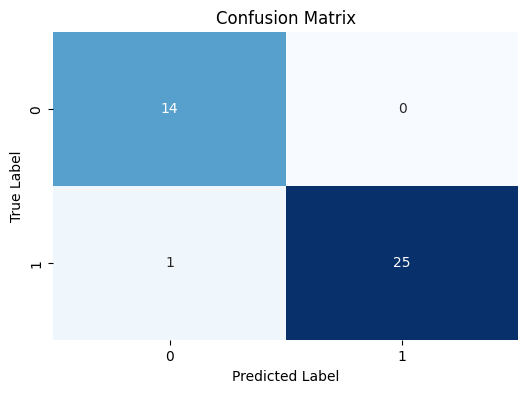

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data (2).csv')

# Exploratory Data Analysis (EDA)
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Define features (X) and target (y)
# Assuming the target column is named 'target'
X = data.drop('target', axis=1)  # Drop the target column from features
y = data['target']               # Target column

# Check target variable type and unique values
print("\nUnique values in the target variable:")
print(y.unique())

# Convert target variable to categorical if it's continuous
# For binary classification: Convert based on a threshold
if y.dtype != 'int' and y.dtype != 'bool':
    # Choose a threshold value for binary classification (adjust as necessary)
    threshold_value = y.median()  # Example: Use the median as a threshold
    y = (y > threshold_value).astype(int)  # Converts to binary classes 0 and 1
    print("\nConverted target variable to binary classes based on threshold.")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()